
Starting training loop...


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

[INFO] Train Loss: 1.0725, MAE: 0.7195


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]


[INFO] Val Loss: 1.0102, MAE: 0.7028


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

[INFO] Train Loss: 0.9372, MAE: 0.6403


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.34s/it]


[INFO] Val Loss: 1.0415, MAE: 0.7492


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

[INFO] Train Loss: 0.8469, MAE: 0.6294


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]


[INFO] Val Loss: 1.4334, MAE: 0.9017


Epochs:  60%|██████    | 3/5 [00:17<00:11,  5.73s/it]

[INFO] Updated Learning Rate: 0.000100


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

[INFO] Train Loss: 0.7714, MAE: 0.5978


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]


[INFO] Val Loss: 0.9333, MAE: 0.7074


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  1.99s/it]

[INFO] Train Loss: 0.7597, MAE: 0.5913


Training Batches: 100%|██████████| 2/2 [00:04<00:00,  2.33s/it]


[INFO] Val Loss: 0.8717, MAE: 0.6718


Epochs: 100%|██████████| 5/5 [00:28<00:00,  5.66s/it]


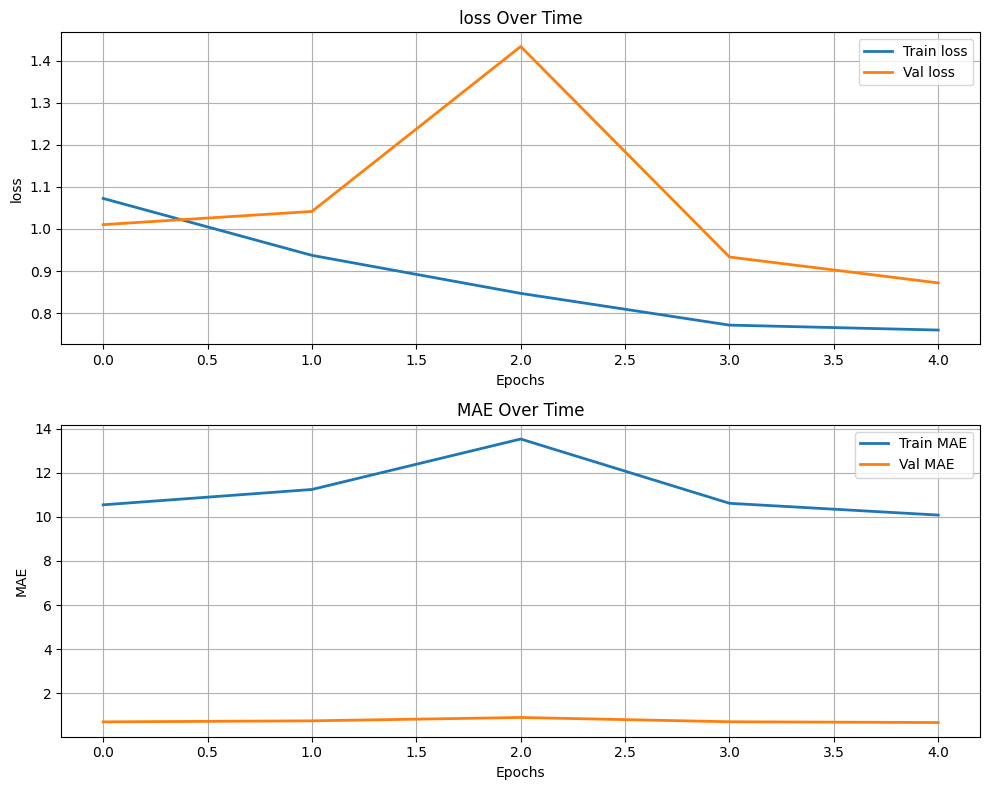

[INFO] Training history plot saved to ./training_history


<Figure size 640x480 with 0 Axes>

In [ ]:
import os
os.chdir("../..")  # Change to project root directory
from packages.models.autoencoder import Conv3DAutoencoder
from packages.train.training import train_model
from packages.io.input_loader import get_data_loaders
import torch
import os
from packages.data_objects.dataset import Dataset
from dotenv import load_dotenv
model = Conv3DAutoencoder(in_channels=50, embedding_dim=256)
load_dotenv()
dataset_path = "/home/lolly/Desktop/test/patient1"
# Dummy training loop
optimizer = torch.optim.AdamW
criterion = torch.nn.MSELoss
mae = torch.nn.L1Loss

config = {
    'batch_size': 32,
    'lr': 1e-3,
    'epochs': 5,
    'backup_interval': 10,
    'EarlyStopping' : {'patience': 5, 'min_delta': 0.1},
    #'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    'ReduceLROnPlateau': {'mode': 'min', 'patience': 1, 'factor': 0.1},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'}
}

metrics = {'MAE': mae}

dataset = Dataset.get_test_dataset(root_folder=dataset_path, unpack_func='dict',nsamples=50)

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3, 'test': 0})

print("\nStarting training loop...")
model.train()
train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics=metrics)

/home/lolly/Projects/MIEEG/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


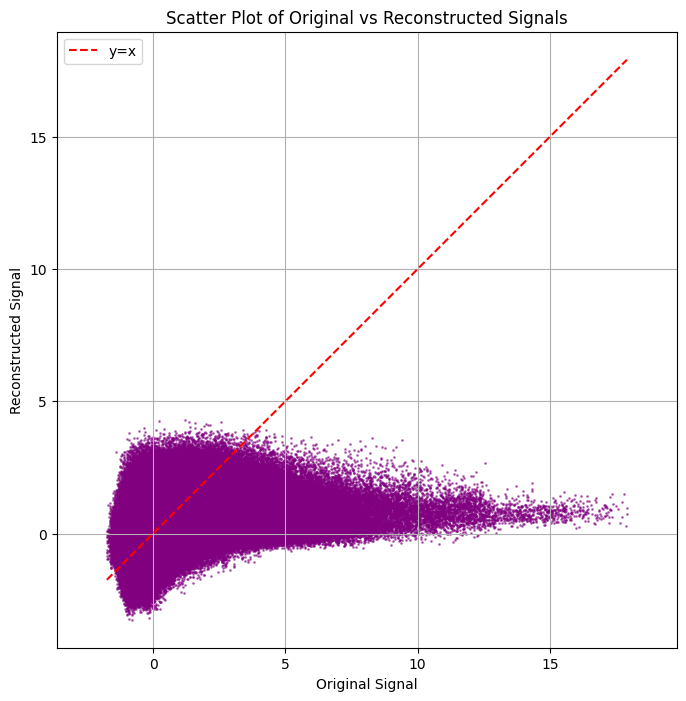

In [3]:
from packages.plotting.reconstruction_plots import plot_reconstruction_scatter
sample = next(iter(val_loader))
inputs = sample.to(torch.device('cpu'))
model.eval()
with torch.no_grad():
    reconstructed = model(inputs)
# Plotting the scatter plot
plot_reconstruction_scatter(original=inputs, reconstructed=reconstructed)